In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

np.random.seed(42)
DPI = 150
BACKGROUND_COLOR = (0.98,0.98, 0.98)

In [2]:
height_mean = 180
height_sd = 10
offset = 25
coefficient = 0.3
noise = 4
N = 10000
height = height_mean + height_sd * np.random.randn(N)
score = offset + coefficient * height + noise * np.random.randn(N)

In [3]:
total_variance_measured = np.var(score)
total_variance_expected = coefficient**2 * height_sd**2 + noise**2
print('Total variance measured: %.2f' % total_variance_measured)
print('Total variance expected: %.2f' % total_variance_expected)

expected_explained_variance = coefficient**2 * height_sd**2 / (coefficient**2 * height_sd**2 + noise**2)
rho = np.corrcoef(height, score)[0, 1]
print('Explained variance: %.2f%%' % (rho**2 * 100))
print('Expected explained variance: %.2f%%' % (100*expected_explained_variance))

Total variance measured: 24.89
Total variance expected: 25.00
Explained variance: 35.59%
Expected explained variance: 36.00%


In [4]:
pd.DataFrame({'height': np.round(height,0), 'score': np.round(score,1)}).head(n=10)

,height,score
0,185.0,77.8
1,179.0,77.4
2,186.0,78.6
3,195.0,84.0
4,178.0,83.1
5,178.0,75.2
6,196.0,87.7
7,188.0,78.2
8,175.0,74.2
9,185.0,83.9


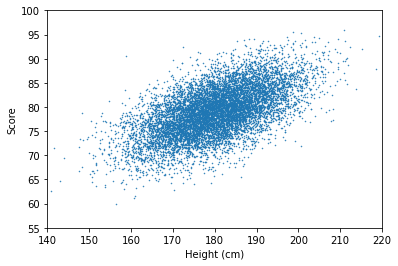

In [5]:
plt.plot(height, score, '.', markersize=1)
plt.xlabel('Height (cm)')
plt.ylabel('Score')
plt.xlim(140,220)
plt.ylim(55,100)
plt.savefig('height_score.png', dpi=DPI, transparent=False, facecolor=BACKGROUND_COLOR)

slope: 0.296587    intercept: 25.668406
R-squared: 0.355882


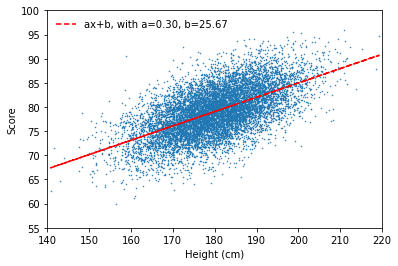

In [6]:
# Compute the regression line, and display it with its equation
slope, intercept, r_value, p_value, std_err = stats.linregress(height, score)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(height, score, '.', markersize=1)
plt.plot(height, intercept + slope*height, '--r', label='ax+b, with a=%.2f, b=%.2f' % (slope, intercept))
plt.legend(frameon = False, loc='upper left')
plt.xlim(140,220)
plt.ylim(55,100)
plt.xlabel('Height (cm)')
plt.ylabel('Score')
plt.savefig('height_score_regression.png', dpi=DPI, transparent=False, facecolor=BACKGROUND_COLOR)

In [7]:
rho = np.corrcoef(height, score)[0, 1]
print("Correlation coefficient:", rho)

Correlation coefficient: 0.5965586948155868


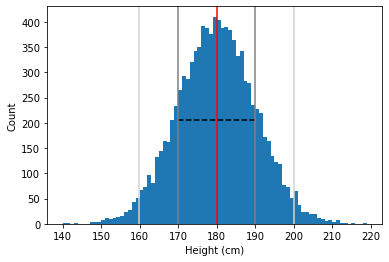

In [8]:
# Histogram of heights
h = plt.hist(height, bins=np.arange(140,220,1))
plt.axvline(np.mean(height), color='r')
# Draw a line at half the maximum height going from mean- std to mean + std
plt.plot([np.mean(height)-np.std(height), np.mean(height)+np.std(height)], [np.max(h[0])/2, np.max(h[0])/2], '--k')
plt.axvline(np.mean(height)-np.std(height), color='gray', linestyle='-')
plt.axvline(np.mean(height)+np.std(height), color='gray', linestyle='-')
plt.axvline(np.mean(height) - 2 * np.std(height), color='lightgray', linestyle='-')
plt.axvline(np.mean(height) + 2 * np.std(height), color='lightgray', linestyle='-')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.savefig('height_histogram.png', dpi=DPI, transparent=False, facecolor=BACKGROUND_COLOR)

Mean score: 79.05
Std score: 4.99


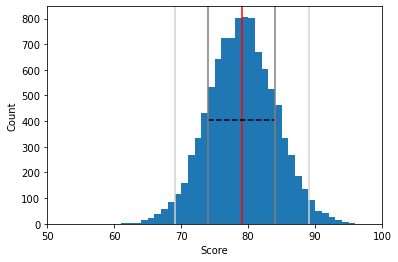

In [9]:
# Histogram of scores (with a line at the mean and std)
h = plt.hist(score, bins=np.arange(50,100,1))
plt.axvline(np.mean(score), color='r')
plt.plot([np.mean(score)-np.std(score), np.mean(score)+np.std(score)], [np.max(h[0])/2, np.max(h[0])/2], 'k--')
plt.axvline(np.mean(score)-np.std(score), color='gray', linestyle='-')
plt.axvline(np.mean(score)+np.std(score), color='gray', linestyle='-')
plt.axvline(np.mean(score) - 2 * np.std(score), color='lightgray', linestyle='-')
plt.axvline(np.mean(score) + 2 * np.std(score), color='lightgray', linestyle='-')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xlim(50,100)
plt.savefig('score_histogram.png', dpi=DPI, transparent=False, facecolor=BACKGROUND_COLOR)
print("Mean score: %.2f" % np.mean(score))
print("Std score: %.2f" % np.std(score))

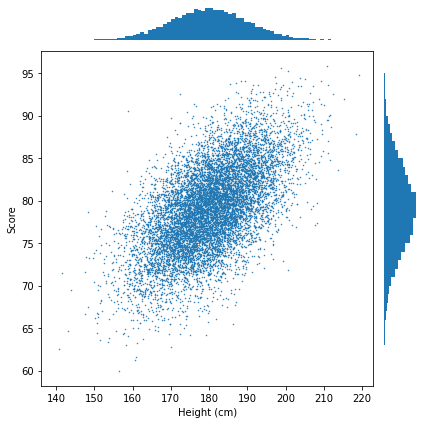

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6),
                         gridspec_kw={'height_ratios': [1, 10], 'width_ratios': [10, 1]})

# Main correlation plot
axs[1, 0].plot(height, score, '.', markersize=1)
axs[1, 0].set_xlabel('Height (cm)')
axs[1, 0].set_ylabel('Score')

# Height histogram
axs[0, 0].hist(height, bins=np.arange(140, 220, 1), orientation='vertical')
axs[0, 0].set_frame_on(False)
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

# Score histogram
axs[1, 1].hist(score, bins=np.arange(50, 100, 1), orientation='horizontal')
axs[1, 1].set_frame_on(False)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

# Match x and y limits
axs[1, 0].set_xlim(axs[0, 0].get_xlim())
axs[1, 1].set_ylim(axs[1, 0].get_ylim())

# Hide the top-right empty subplot
axs[0, 1].axis('off')

plt.tight_layout()
plt.savefig('height_score_joint.png', dpi=DPI, transparent=False, facecolor=BACKGROUND_COLOR)

Std score on slice: 3.97


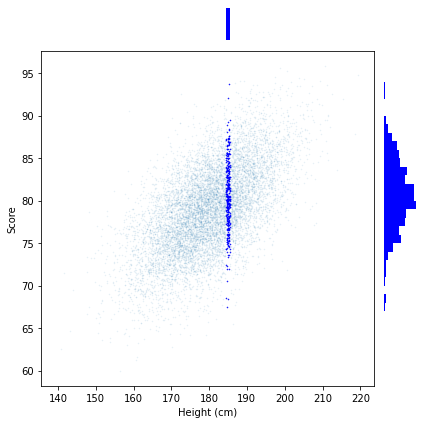

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6),
                         gridspec_kw={'height_ratios': [1, 10], 'width_ratios': [10, 1]})

# Filter data points based on height
mask = (height >= 185 - 0.5) & (height <= 185 + 0.5)
height_filtered = height[mask]
score_filtered = score[mask]

# Main correlation plot
axs[1, 0].plot(height, score, '.', markersize=1, alpha=0.1)
axs[1, 0].plot(height_filtered, score_filtered, '.', markersize=1, color='blue', alpha=1.0)
axs[1, 0].set_xlabel('Height (cm)')
axs[1, 0].set_ylabel('Score')

# Height histogram
axs[0, 0].hist(height_filtered, bins=np.arange(140-0.5, 220+0.5, 1), orientation='vertical',color="blue")
axs[0, 0].set_frame_on(False)
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

# Score histogram
axs[1, 1].hist(score_filtered, bins=np.arange(50, 100, 1), orientation='horizontal',color="blue")
axs[1, 1].set_frame_on(False)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

# Match x and y limits
axs[1, 0].set_xlim(axs[0, 0].get_xlim())
axs[1, 1].set_ylim(axs[1, 0].get_ylim())

# Hide the top-right empty subplot
axs[0, 1].axis('off')

plt.tight_layout()
plt.savefig('height_score_joint_filtered.png', dpi=DPI, transparent=False, facecolor=BACKGROUND_COLOR)
print("Std score on slice: %.2f" % np.std(score_filtered))

Average loca std: 3.99


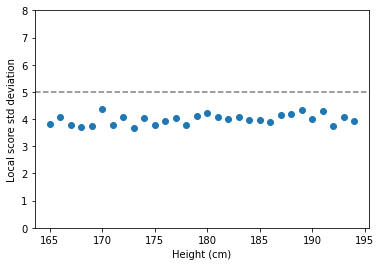

In [12]:
# Variance on slices
height_range = np.arange(165, 195, 1)
half_width = 0.5
sliced_stds = [np.std(score[np.logical_and(height > h-half_width, height < h+half_width)]) for h in height_range]
plt.plot(height_range, sliced_stds,'o')
plt.ylim(0,8);
plt.axhline(np.std(score), color='gray', linestyle='--')
plt.xlabel('Height (cm)')
plt.ylabel('Local score std deviation');
plt.savefig('height_score_std_per_slice.png', dpi=DPI, transparent=False, facecolor=BACKGROUND_COLOR)
avg_std = np.mean(sliced_stds)
print("Average loca std: %.2f" % avg_std)

In [13]:
print("Local variance: %.2f" % (avg_std**2))
print("Measured variance", np.var(score))
residual_variance = np.var(score) - avg_std**2
print("Explained variance: %.2f" % (100*(residual_variance) / np.var(score)) + "%")

Local variance: 15.91
Measured variance 24.88608483600149
Explained variance: 36.08%


In [14]:
a = 104         # aspirin / heart attack
b = 189         # placebo / heart attack
c = 10933       # aspirin / no heart attack
d = 10845       # placebo / no heart attack
aspirin = [1] * a + [0] * c  + [0] * b+ [1] * d
heart_attack = [1] * a + [0] * c  + [1] * b + [0] * d

print("Correlation coefficient : %.2f" % np.corrcoef(aspirin, heart_attack)[0, 1])
print("Phi coefficient : %.2f" % ((a * d - b * c) / np.sqrt((a + b) * (a + c) * (b + d) * (c + d))))

Correlation coefficient : -0.03
Phi coefficient : -0.03
